In [1]:
# Kerakli kutubxonalar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


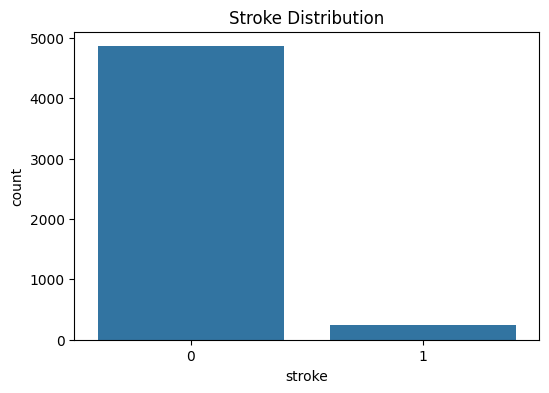

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='stroke', data=df)
plt.title('Stroke Distribution')
plt.show()

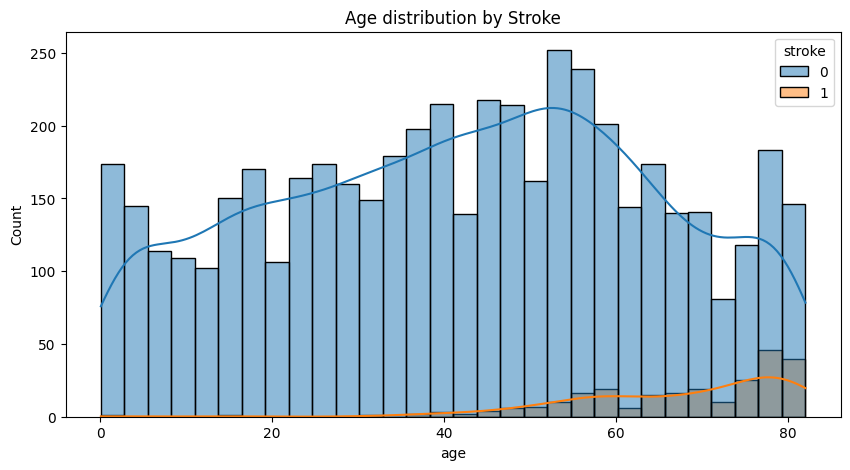

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', hue='stroke', bins=30, kde=True)
plt.title('Age distribution by Stroke')
plt.show()

In [8]:
# Null qiymatlarni tekshib olamiz

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == "object":
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_22256\982742513.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [10]:
df.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
def encodlash(df):
    for col in df.columns:
        if df[col].dtype=='object':
            if df[col].nunique()<=6:
                dummies=pd.get_dummies(df[col],prefix=col,dtype=int)
                df=pd.concat([df.drop(columns=[col]),dummies],axis=1)
            else:
                df[col]=encoding.fit_transform(df[col])
    return df

In [12]:
df=encodlash(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Female                   5110 non-null   int64  
 8   gender_Male                     5110 non-null   int64  
 9   gender_Other                    5110 non-null   int64  
 10  ever_married_No                 5110 non-null   int64  
 11  ever_married_Yes                5110 non-null   int64  
 12  work_type_Govt_job              51

In [19]:
scaler=StandardScaler()
def scaling_qil(df):
    numerical_col=df.select_dtypes(include=['int64', 'int32','float64']).columns.drop('Survived')
    df[numerical_col]=scaler.fit_transform(df[numerical_col])
    return df

In [20]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [23]:
x=df.drop('stroke',axis=1)

In [24]:
y=df['stroke']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
model=KNeighborsClassifier(n_neighbors=5)

In [27]:
model

KNeighborsClassifier()

In [28]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
y_pred=model.predict(x_test)

In [31]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [33]:
score=accuracy_score(y_test,y_pred)

In [34]:
score

0.9393346379647749

In [36]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle=True) 
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')
print(scores)


[0.93933464 0.95009785 0.96086106 0.94911937 0.95694716]


In [42]:
print(np.mean(scores).round(3))

0.951


In [41]:
np.std(scores)

np.float64(0.007384721042705775)

In [46]:
from sklearn.svm import SVC

In [47]:
svc = SVC(kernel='rbf', random_state=42)

In [50]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svc_scores = cross_val_score(svc, x_scaled, y, cv=kf, scoring='accuracy')

# Natijalar
print("SVC accuracy for each fold:", svc_scores)
print("SVC Mean Accuracy:", svc_scores.mean())
print("SVC Standard Deviation (STD):", svc_scores.std())

SVC accuracy for each fold: [0.95107632 0.95107632 0.95107632 0.95107632 0.95205479]
SVC Mean Accuracy: 0.9512720156555773
SVC Standard Deviation (STD): 0.0003913894324853562


In [53]:
# Modelni butun datasetga fit qilish
svc.fit(x_scaled, y)

SVC(random_state=42)

In [55]:
y_pred_svc = svc.predict(x_scaled)

In [56]:
print("SVC Classification Report:\n")
print(classification_report(y, y_pred_svc))

SVC Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       1.00      0.00      0.01       249

    accuracy                           0.95      5110
   macro avg       0.98      0.50      0.49      5110
weighted avg       0.95      0.95      0.93      5110



In [ ]:
knn =  0.93 
svc = 0.95      